# Linear Regression

In [5]:
# Required Packages
 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [6]:
# Function to get data
def get_data(file_name):
    data = pd.read_csv(file_name)
    x_parameter = []
    y_parameter = []
    print (data);
    for single_square_feet ,single_price_value in zip(data['square_feet'],data['price']):
    #for single_square_feet ,single_price_value in (data.loc[:,'square_feet'],data['price']):
        x_parameter.append([float(single_square_feet)])
        y_parameter.append(float(single_price_value))
    return x_parameter,y_parameter
x,y = get_data('~/Documents/rajesh/learning/regression/home_prices.csv')
print (x)
print (y)

   No  square_feet  price
0   1          150   6450
1   2          200   7450
2   3          250   8450
3   4          300   9450
4   5          350  11450
5   6          400  15450
6   7          600  18450
[[150.0], [200.0], [250.0], [300.0], [350.0], [400.0], [600.0]]
[6450.0, 7450.0, 8450.0, 9450.0, 11450.0, 15450.0, 18450.0]


In [7]:
# Function for Fitting data to Linear model
def linear_model_main(X_parameters,Y_parameters,predict_value):
 
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X_parameters, Y_parameters)
    predict_outcome = regr.predict(predict_value)
    predictions = {}
    predictions['intercept'] = regr.intercept_
    predictions['coefficient'] = regr.coef_
    predictions['predicted_value'] = predict_outcome
    return predictions

In [16]:
x,y = get_data('~/Documents/rajesh/learning/regression/home_prices.csv')
predict_value = 700 # 700 square feet
result = linear_model_main(x,y,predict_value)
print ("Intercept value " , result['intercept'])
print ("coefficient" , result['coefficient'])
print ("Predicted value: ",result['predicted_value'])

predict_value=900
result = linear_model_main(x,y,predict_value)
print ("Predicted value: ",result['predicted_value'])

   No  square_feet  price
0   1          150   6450
1   2          200   7450
2   3          250   8450
3   4          300   9450
4   5          350  11450
5   6          400  15450
6   7          600  18450
Intercept value  1771.8085106382969
coefficient [28.77659574]
Predicted value:  [21915.42553191]
Predicted value:  [27670.74468085]


In [19]:
from matplotlib.pyplot import *
# Function to show the resutls of linear fit model
def show_linear_line(X_parameters,Y_parameters):
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X_parameters, Y_parameters)
    plt.scatter(X_parameters,Y_parameters,color='blue')
    plt.plot(X_parameters,regr.predict(X_parameters),color='red',linewidth=4)
    plt.xticks(())
    plt.yticks(())
    xlabel('x')
    ylabel('y')
    #legend(['Measured'],['predicted'])
    plt.show()



   No  square_feet  price
0   1          150   6450
1   2          200   7450
2   3          250   8450
3   4          300   9450
4   5          350  11450
5   6          400  15450
6   7          600  18450


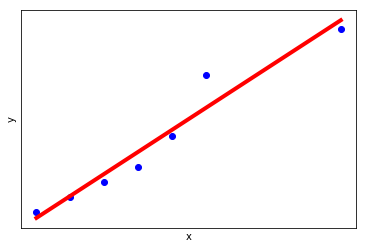

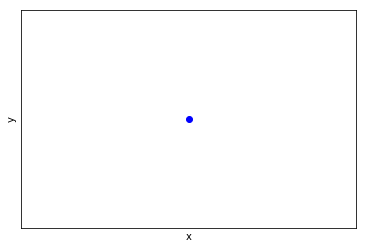

In [21]:
x,y = get_data('~/Documents/rajesh/learning/regression/home_prices.csv')
show_linear_line(x,y)
result = linear_model_main(x,y,800)
show_linear_line(800,result['predicted_value'])

# https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/
# Standalone simple linear regression example


In [28]:
from math import sqrt
#calculate root square mean error
def rmse_metric(actual, predicted):
    sum_error =0.0
    for i in range(len(actual)):
        prediction_error = actual[i] - predicted[i]
        sum_error += prediction_error**2
    mean_square_error= sum_error/float(len(actual))
    return sqrt(mean_square_error)

#Evaluate regresion of training set
def evaluate_algorithm(dataset,algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        #print(row,'\n', row_copy)
        row_copy[-1] = None # some_list[-n] syntax gets the nth-to-last element.
        #print(row_copy[-2],row_copy[-1])
        test_set.append(row_copy)
        print(test_set)
    actual = [row[-1] for row in dataset] ###row[-1] and row[1] for row in dataset will pick second element in each row
    print('actual-->',actual)
   
    predicted = algorithm(dataset,test_set);
    print('predicted-->',predicted)
    #actual = [row[-1] for row in dataset]
    rmse=rmse_metric(actual, predicted)
    return rmse

#calculate mean of list of numbers
def mean(values):
    return sum(values)/float(len(values))

#Calculate covariance between x and y
def covariance(x, x_mean, y, y_mean):
    covar = 0.0
    for i in range(len(x)):
        covar +=(x[i]-x_mean)*(y[i]-y_mean) # x[i]-x_mean is standard deviation
    return covar

#Calculate variance of list of numbers
def variance(values,mean):
    var = 0.0
    print('\n values ***********',values)
    for row in values:
        var += (row-mean)**2
    return var
    #return sum([(x-mean)**2 for x in values]) # alternative

#Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean,y_mean = mean(x),mean(y)
    print('x_mean',x_mean)
    print('y_mean',y_mean)
    #print('variance', variance(x,x_mean))
    b1 = covariance(x,x_mean,y,y_mean)/variance(x,x_mean)
    b0 = y_mean - b1*x_mean # y = ax + b; b = y-ax;
    return[b0,b1]

#Simple Linear Regression
def simple_linear_regression(train,test):
    predictions = list();
    b0,b1 = coefficients(train)
    for row in test:
        y_predict = b0 + b1*row[0]
        predictions.append(y_predict)
    return predictions

# Test simple linear regression
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))
    

[[1, None]]
[[1, None], [2, None]]
[[1, None], [2, None], [4, None]]
[[1, None], [2, None], [4, None], [3, None]]
[[1, None], [2, None], [4, None], [3, None], [5, None]]
actual--> [1, 3, 3, 2, 5]
x_mean 3.0
y_mean 2.8

 values *********** [1, 2, 4, 3, 5]
predicted--> [1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
RMSE: 0.693


# Polynomial : http://scikit-learn.org/0.17/auto_examples/model_selection/plot_underfitting_overfitting.html

Automatically created module for IPython interactive environment


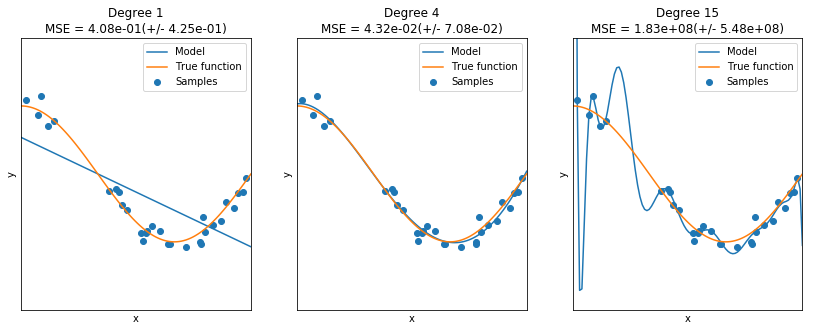

In [6]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# https://plot.ly/python/polynomial-fits/

[1 2 3 9 5 6 6 8]
z  [ 0.0804104  -0.6169172   3.13645311]
         2
0.08041 x - 0.6169 x + 3.136
z  [-0.0235549   0.44051209 -2.15951883  4.72616876]
          3          2
-0.02355 x + 0.4405 x - 2.16 x + 4.726


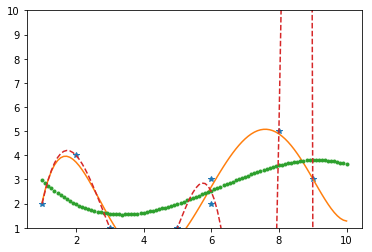

In [12]:
import numpy as np
#points = np.array([(1,2),(2,4)])
#points = np.array([(1,2),(2,4),(3,1),(9,3)])
#modified to get model graph
points = np.array([(1,2),(2,4),(3,1),(9,3),(5,1),(6,3),(6,2),(8,5)])

#Get x and y vectors
x = points[:,0]
y = points[:,1]
print(x)
#Calculate polynomial
z = np.polyfit(x,y,2)
print('z ',z)
f = np.poly1d(z)
print(f)
z = np.polyfit(x,y,3)
print('z ',z)
f = np.poly1d(z)
print(f)

p = np.poly1d(z)
p5 = np.poly1d(np.polyfit(x, y, 5))  # *** right fit
p3 = np.poly1d(np.polyfit(x, y, 3))
p30 = np.poly1d(np.polyfit(x, y, 30))


xp = np.linspace(1, 10, 100)
_ = plt.plot(x, y, '*', xp, p5(xp), '-',xp, p3(xp), '.', xp, p30(xp), '--')
plt.ylim(1,10)

plt.show()




# https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html#numpy.polyfit

[ 0.08703704 -0.81349206  1.69312169 -0.03968254]


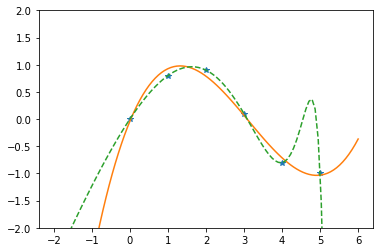

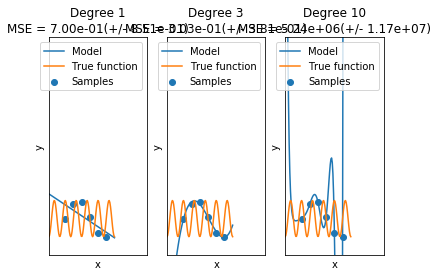

In [22]:
import sys
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore', np.RankWarning)

x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
print(z)

p = np.poly1d(z)
p30 = np.poly1d(np.polyfit(x, y, 30))


xp = np.linspace(-2, 6, 100)
_ = plt.plot(x, y, '*', xp, p(xp), '-', xp, p30(xp), '--')
plt.ylim(-2,2)

plt.show()

# ******** pipeline approach

degrees = [1, 3, 10]  # in this case degree 10 overfits, 3 generalizes

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x[:, np.newaxis], y)
    #print('********* ',pipeline.fit(x[:, np.newaxis], y))

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        x[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=6)

    x_test = np.linspace(-2, 6, 100)
    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]), label="Model")
    plt.plot(x_test, true_fun(x_test), label="True function")
    plt.scatter(x, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((-2, 10))
    plt.ylim((-2, 10))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# https://stackoverflow.com/questions/42998607/large-dataset-polynomial-fitting-using-numpy

        2
-3.496 x + 2.18 x + 17.26
        2
-3.496 x + 2.18 x + 17.26


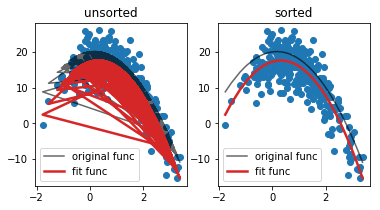

In [2]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)

x = (np.random.normal(size=300)+1)
fo = lambda x: -3*x**2+ 1.*x +20. 
f = lambda x: fo(x) + (np.random.normal(size=len(x))-0.5)*4
y = f(x)

fig, (ax, ax2) = plt.subplots(1,2, figsize=(6,3))
ax.scatter(x,y)
ax2.scatter(x,y)

def fit(ax, x,y, sort=True):
    z = np.polyfit(x, y, 2)
    fit = np.poly1d(z)
    print(fit)
    ax.set_title("unsorted")
    if sort:
        x = np.sort(x)
        ax.set_title("sorted")
    ax.plot(x, fo(x), label="original func", color="k", alpha=0.6)
    ax.plot(x, fit(x), label="fit func", color="C3", alpha=1, lw=2.5  )  
    ax.legend()


fit(ax, x,y, sort=False)

fit(ax2, x,y, sort=True) 


plt.show()